<h1>Applied Data Science</h1>
<h2>Capstone Project - The Battle of the Neighbourhoods</h2>

This notebook will be mainly used for the capstone project.

<h3>Introduction</h3>

London is one of the most popular and multicultural cities in the World. It is diverse and is the financial capital of the UK and Europe. It provides lot of business opportunities and business friendly environment. It is a global hub of business and commerce. The city is a major centre for banking and finance, retailing, world trade, transportation, tourism, real estate, new media, traditional media, advertising, legal services, accountancy, insurance, theatre, fashion, and the arts in Europe. Therefore, London attracts many people, especially young professionals. 
<p>There are many criterions for people who would like to move to London. One of the top concerns is safety when finding a new place. Safety is naturally a really big factor in buying or renting a home. This project aims to find out the safest borough and explore its neighbourhoods in London by analysing data based on crime statistics. 


<h3>Data</h3>

In order to solve the problem, the following data sources are used in this project.
<p>1-	London Recorded Crime:  Geographic Breakdown
<p>Source: London Datastore
<p>https://data.london.gov.uk/dataset/recorded_crime_summary 
<p>The main focus is analysing MPS Borough Level Crime (most recent 24 months). Data is taken between 2018-06-01 and 2020-05-31 

<p>2-	List of London Boroughs
<p>This is a list of local authority districts within Greater London, including 32 London boroughs and the City of London. The London boroughs were all created on 1 April 1965. <p>Upon creation, twelve were designated Inner London boroughs and the remaining twenty were designated Outer London boroughs. The Office for National Statistics has amended the <p>designations of three boroughs for statistics purposes only.
<p>Source: Wikipedia
<p>https://en.wikipedia.org/wiki/List_of_London_boroughs 

<p>3-	Foursquare API
<p>Foursquare API is used to extract venues from selected neighbourhood

<h4>Import Libraries</h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
!pip install lxml
!pip install beautifulsoup4
import requests
import lxml
from bs4 import BeautifulSoup
from itertools import cycle, islice
import folium
!pip install geopy
from geopy.geocoders import Nominatim
print("Imported the libraries")

     |████████████████████████████████| 5.5MB 5.1MB/s eta 0:00:01   |████████████████████████████    | 4.8MB 5.1MB/s eta 0:00:01██████████████████████████████▉| 5.5MB 5.1MB/s eta 0:00:01
     |████████████████████████████████| 122kB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 122kB 5.4MB/s eta 0:00:01
Imported the libraries


<h4>Get Crime Data</h4>

In [2]:
# Read crime records data
df_crime = pd.read_csv("MPS Borough Level Crime (most recent 24 months) 2020-05-31.csv")
df_crime.head()

,MajorText,MinorText,LookUp_BoroughName,201806,201807,201808,201809,201810,201811,201812,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,12,6,5,3,8,5,1,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,123,127,101,107,132,105,88,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,33,30,18,33,32,39,33,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,77,94,84,99,94,106,164,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,6,8,7,10,7,7,4,...,7,7,10,12,3,13,4,6,11,11


In [3]:
# Dimension of Data
df_crime.shape

(1566, 27)

In [4]:
#Check if there is any null
df_crime.isnull().values.any()

False

In [5]:
#Rename column
df_crime.rename(columns = {'LookUp_BoroughName':'Borough'}, inplace = True) 
#Get Borough Names
df_crime['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham',
       'London Heathrow and London City Airports', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

In [6]:
# Create a column for sum of incidents in 24 months
df_crime['Sum'] = df_crime.iloc[:,3:27].sum(axis=1)
crime_sum = df_crime['Sum']
df_crime.drop(labels=['Sum'], axis=1,inplace = True)
df_crime.insert(3, 'Sum', crime_sum)
df_crime.head()

,MajorText,MinorText,Borough,Sum,201806,201807,201808,201809,201810,201811,...,201908,201909,201910,201911,201912,202001,202002,202003,202004,202005
0,Arson and Criminal Damage,Arson,Barking and Dagenham,127,12,6,5,3,8,5,...,3,6,9,8,6,4,5,6,2,2
1,Arson and Criminal Damage,Criminal Damage,Barking and Dagenham,2691,123,127,101,107,132,105,...,118,109,109,97,121,97,103,107,80,88
2,Burglary,Burglary - Business and Community,Barking and Dagenham,700,33,30,18,33,32,39,...,35,37,30,30,25,31,17,28,29,16
3,Burglary,Burglary - Residential,Barking and Dagenham,2337,77,94,84,99,94,106,...,67,80,97,114,130,116,123,97,57,41
4,Drug Offences,Drug Trafficking,Barking and Dagenham,177,6,8,7,10,7,7,...,7,7,10,12,3,13,4,6,11,11


In [7]:
# Delete unnecessary columns
df_crime.drop(df_crime.columns[0:2], axis=1, inplace=True)
df_crime.drop(df_crime.columns[2:26], axis=1, inplace=True)
df_crime.head()

,Borough,Sum
0,Barking and Dagenham,127
1,Barking and Dagenham,2691
2,Barking and Dagenham,700
3,Barking and Dagenham,2337
4,Barking and Dagenham,177


In [8]:
# Calculate sum of incidents in the last 24 months by boroughs
df_crime = df_crime.groupby(['Borough'], as_index=False).sum()
df_crime.head()

,Borough,Sum
0,Barking and Dagenham,38713
1,Barnet,59484
2,Bexley,33832
3,Brent,60193
4,Bromley,47930


In [9]:
# Change the sum into monthly average
df_crime['Sum'] = df_crime['Sum']/24
df_crime.rename(columns={df_crime.columns[1]:'MonthlyAverage'}, inplace=True)
df_crime.head()

,Borough,MonthlyAverage
0,Barking and Dagenham,1613.041667
1,Barnet,2478.500000
2,Bexley,1409.666667
3,Brent,2508.041667
4,Bromley,1997.083333


In [10]:
#Display borough with most incidents
df_crime.sort_values(by='MonthlyAverage', ascending=False).head()

,Borough,MonthlyAverage
32,Westminster,6009.166667
27,Southwark,3088.875000
5,Camden,3070.500000
24,Newham,2946.083333
20,Lambeth,2885.750000


In [11]:
#Display borough with least incidents
df_crime.sort_values(by='MonthlyAverage', ascending=True).head()

,Borough,MonthlyAverage
22,London Heathrow and London City Airports,269.958333
19,Kingston upon Thames,1054.625000
26,Richmond upon Thames,1058.750000
28,Sutton,1117.750000
23,Merton,1171.458333


In [12]:
#Drop Heathrow Airport as it is not a residential area & not included in population data
df_crime.drop([22], 0, inplace=True)
df_crime.reset_index(drop=True, inplace=True)

<h4>Get List of Boroughs from Wikipedia</h4>

In [13]:
website_text = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs').text
soup = BeautifulSoup(website_text,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
table_rows = table.find_all('tr')
data = []
for row in table_rows:
    td=[]
    for t in row.find_all('td'):
        td.append(t.text.strip())
    data.append(td)
df_boroughs = pd.DataFrame(data, columns=['Borough', 'Inner', 'Status', 'Local Authority', 'Political_Control', 'HQ', 'Area', 'Population', 'Coordinates', 'Nr_In_Map'])
df_boroughs.head()

,Borough,Inner,Status,Local Authority,Political_Control,HQ,Area,Population,Coordinates,Nr_In_Map
0,None,None,None,None,None,None,None,None,None,None
1,Barking and Dagenham [note 1],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...,25
2,Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...,31
3,Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...,23
4,Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...,12


In [14]:
df_boroughs.drop(['Inner', 'Status', 'Local Authority', 'Political_Control', 'HQ', 'Area', 'Nr_In_Map'], axis=1, inplace=True)
df_boroughs.head()

,Borough,Population,Coordinates
0,None,None,None
1,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
2,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
3,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
4,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...


In [15]:
df_boroughs.shape

(33, 3)

In [16]:
#df_boroughs.dropna()
df_boroughs.drop([0],0,inplace=True) 
df_boroughs.reset_index(drop=True, inplace=True)
df_boroughs.head()

,Borough,Population,Coordinates
0,Barking and Dagenham [note 1],"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [22]:
df_boroughs.shape

(32, 3)

In [17]:
# Strip unwanted texts
df_boroughs['Borough'] = df_boroughs['Borough'].map(lambda x: x.rstrip(']'))
df_boroughs['Borough'] = df_boroughs['Borough'].map(lambda x: x.rstrip('1234567890.'))
df_boroughs['Borough'] = df_boroughs['Borough'].str.replace('note','')
df_boroughs['Borough'] = df_boroughs['Borough'].map(lambda x: x.rstrip(' ['))
df_boroughs = df_boroughs.reset_index(drop=True)
df_boroughs.head()

,Borough,Population,Coordinates
0,Barking and Dagenham,"194,352",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ /...
1,Barnet,"369,088",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ /...
2,Bexley,"236,687",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ /...
3,Brent,"317,264",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ /...
4,Bromley,"317,899",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ /...


In [18]:
# Split coordinates
df_boroughs[['Coordinates1','Coordinates2','Coordinates3']] = df_boroughs['Coordinates'].str.split('/',expand=True)
#Remove unnecessary columns
df_boroughs.drop(labels=['Coordinates','Coordinates1','Coordinates2'], axis=1,inplace = True)
#Split Coordinates into Latitude and Longitude
df_boroughs[['Latitude','Longitude']] = df_boroughs['Coordinates3'].str.split(';',expand=True)
#Remove Coordinates3 column
df_boroughs.drop(labels=['Coordinates3'], axis=1,inplace = True)
#Clean-up data
df_boroughs['Latitude'] = df_boroughs['Latitude'].map(lambda x: x.rstrip(u'\ufeff'))
df_boroughs['Latitude'] = df_boroughs['Latitude'].map(lambda x: x.lstrip())
df_boroughs['Longitude'] = df_boroughs['Longitude'].map(lambda x: x.rstrip(')'))
df_boroughs['Longitude'] = df_boroughs['Longitude'].map(lambda x: x.rstrip('abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ '))
df_boroughs['Longitude'] = df_boroughs['Longitude'].map(lambda x: x.rstrip(' ('))
df_boroughs['Longitude'] = df_boroughs['Longitude'].map(lambda x: x.rstrip(u'\ufeff'))
df_boroughs['Longitude'] = df_boroughs['Longitude'].map(lambda x: x.lstrip())
df_boroughs['Population'] = df_boroughs['Population'].str.replace(',','')
df_boroughs.head()

,Borough,Population,Latitude,Longitude
0,Barking and Dagenham,194352,51.5607,0.1557
1,Barnet,369088,51.6252,-0.1517
2,Bexley,236687,51.4549,0.1505
3,Brent,317264,51.5588,-0.2817
4,Bromley,317899,51.4039,0.0198


In [19]:
df_boroughs['Borough'].unique()

array(['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley',
       'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney',
       'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering',
       'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',
       'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',
       'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
      dtype=object)

<h4>Get Foursquare API Data</h4>

In [20]:
#Foursquare
CLIENT_ID = 'VVB4ILSNJNHTNPQO0VEKQ4KAPSSZMZWEMSLCVEGEFWBURMJQ' #Foursquare ID
CLIENT_SECRET = 'WR3QEPFWQ4FCUSCR4LTLQKX1ZDFWBMWUJXFL01UL4EY2YMTE' #Foursquare Secret
VERSION = '20200620'
LIMIT = 50

In [21]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
df_venues = getNearbyVenues(names=df_boroughs['Borough'],latitudes=df_boroughs['Latitude'],longitudes=df_boroughs['Longitude'])

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


In [23]:
print(df_venues.shape)
df_venues.head()

(1140, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.5607,0.1557,Central Park,51.559560,0.161981,Park
1,Barking and Dagenham,51.5607,0.1557,Crowlands Heath Golf Course,51.562457,0.155818,Golf Course
2,Barking and Dagenham,51.5607,0.1557,Robert Clack Leisure Centre,51.560808,0.152704,Martial Arts Dojo
3,Barking and Dagenham,51.5607,0.1557,Morrisons,51.559774,0.148752,Supermarket
4,Barking and Dagenham,51.5607,0.1557,Beacontree Heath Leisure Centre,51.560997,0.148932,Gym / Fitness Center


<h3>Methodology</h3>

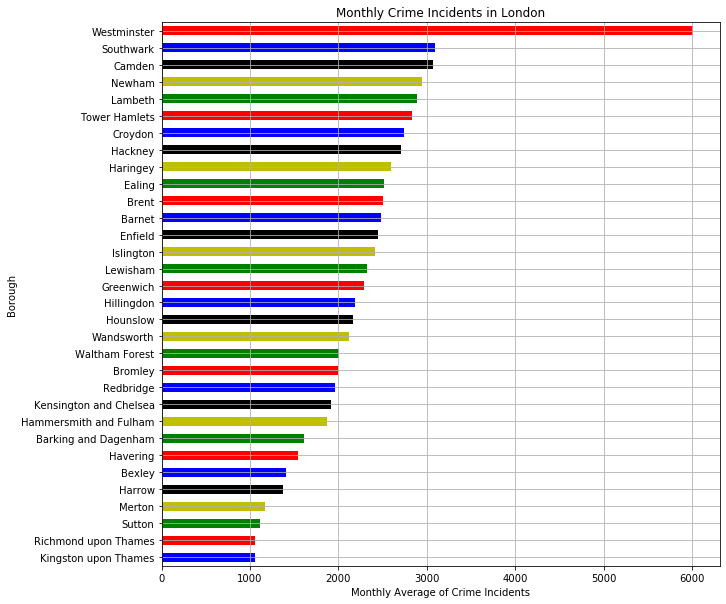

In [24]:
#Visualize crime data
df_crime.set_index('Borough')['MonthlyAverage'].sort_values().plot(kind='barh', grid=True, color=list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df_crime))), figsize=(10,10))
plt.xlabel('Monthly Average of Crime Incidents')
plt.title('Monthly Crime Incidents in London')
plt.show()

In [25]:
#Combine crime data and borough information data
df_combined = pd.merge(df_crime,df_boroughs, how='outer', on='Borough')
df_combined.head()

,Borough,MonthlyAverage,Population,Latitude,Longitude
0,Barking and Dagenham,1613.041667,194352,51.5607,0.1557
1,Barnet,2478.500000,369088,51.6252,-0.1517
2,Bexley,1409.666667,236687,51.4549,0.1505
3,Brent,2508.041667,317264,51.5588,-0.2817
4,Bromley,1997.083333,317899,51.4039,0.0198


In [26]:
#Check data type
df_combined.dtypes

Borough            object
MonthlyAverage    float64
Population         object
Latitude           object
Longitude          object
dtype: object

In [27]:
df_combined['Population'] = pd.to_numeric(df_combined['Population'])
df_combined['Latitude'] = pd.to_numeric(df_combined['Latitude'])
df_combined['Longitude'] = pd.to_numeric(df_combined['Longitude'])
df_combined.dtypes

Borough            object
MonthlyAverage    float64
Population          int64
Latitude          float64
Longitude         float64
dtype: object

In [28]:
df_combined.shape

(32, 5)

In [29]:
#Create a column that shows the number of crimes per 1000 people per month
df_combined['Population'].astype(float)
df_combined['CrimeToPop'] = df_combined['MonthlyAverage'] / df_combined['Population'] * 1000
df_combined.head()

,Borough,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop
0,Barking and Dagenham,1613.041667,194352,51.5607,0.1557,8.299589
1,Barnet,2478.500000,369088,51.6252,-0.1517,6.715201
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826
3,Brent,2508.041667,317264,51.5588,-0.2817,7.905220
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132


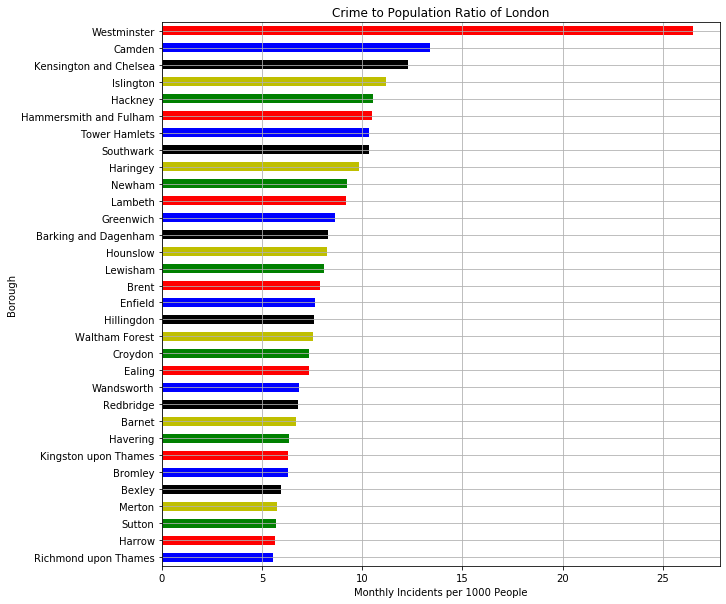

In [30]:
#Visualize crime per 1000 people
df_combined.set_index('Borough')['CrimeToPop'].sort_values().plot(kind='barh', grid=True,color=list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df_combined))), figsize=(10,10))
plt.xlabel('Monthly Incidents per 1000 People')
plt.title('Crime to Population Ratio of London')
plt.show()

In [31]:
#Get coordinates of London
address = 'London, UK'
geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [32]:
# make a map of London using folium
map = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough in zip(df_combined['Latitude'], df_combined['Longitude'], df_combined['Borough']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

In [33]:
print('There are {} uniques categories.'.format(len(df_venues['Venue Category'].unique())))
# encoding before clustering
df_encoding = pd.get_dummies(df_venues[['Venue Category']], prefix="", prefix_sep="")

There are 181 uniques categories.


In [34]:
# Add borough name back to dataframe
borough = df_venues['Borough']
df_encoding.insert(0, 'Borough', borough)
df_encoding.head()

,Borough,African Restaurant,Airport,Airport Lounge,Airport Service,American Restaurant,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Arts & Entertainment,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio
0,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Barking and Dagenham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df_encoding.shape

(1140, 182)

In [36]:
# Group rows by borough and take the mean of frequency of each venue category
df_grouped = df_encoding.groupby('Borough').mean().reset_index()

In [37]:
# top 5 venues for each neighborhood
num_top_venues = 5

for hood in df_grouped['Borough']:
    print("----"+hood+"----")
    temp = df_grouped[df_grouped['Borough'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Barking and Dagenham----
                  venue  freq
0                  Park  0.14
1  Gym / Fitness Center  0.14
2                  Pool  0.14
3           Bus Station  0.14
4           Supermarket  0.14


----Barnet----
                venue  freq
0                Café  0.50
1            Bus Stop  0.25
2  Salon / Barbershop  0.25
3  African Restaurant  0.00
4    Pedestrian Plaza  0.00


----Bexley----
                  venue  freq
0                   Pub  0.10
1        Clothing Store  0.10
2           Coffee Shop  0.10
3  Fast Food Restaurant  0.06
4              Pharmacy  0.06


----Brent----
                 venue  freq
0          Coffee Shop  0.12
1                Hotel  0.10
2       Clothing Store  0.08
3        Grocery Store  0.06
4  Sporting Goods Shop  0.04


----Bromley----
                  venue  freq
0        Clothing Store  0.15
1           Coffee Shop  0.13
2          Burger Joint  0.05
3  Gym / Fitness Center  0.05
4           Pizza Place  0.05


----Camden----
    

In [38]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
df_venues_sorted = pd.DataFrame(columns=columns)
df_venues_sorted['Borough'] = df_grouped['Borough']

for ind in np.arange(df_grouped.shape[0]):
    df_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_grouped.iloc[ind, :], num_top_venues)

df_venues_sorted

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,Golf Course,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
1,Barnet,Café,Salon / Barbershop,Bus Stop,Eastern European Restaurant,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space,English Restaurant
2,Bexley,Coffee Shop,Pub,Clothing Store,Pharmacy,Fast Food Restaurant,Furniture / Home Store,Supermarket,Italian Restaurant,Hotel,Bakery
3,Brent,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Plaza,Roof Deck
4,Bromley,Clothing Store,Coffee Shop,Pizza Place,Gym / Fitness Center,Burger Joint,Irish Pub,Sandwich Place,Café,Chocolate Shop,Pub
5,Camden,Coffee Shop,Café,Hotel,Burger Joint,Breakfast Spot,Deli / Bodega,Pizza Place,Garden,Train Station,Modern European Restaurant
6,Croydon,Coffee Shop,Pub,Portuguese Restaurant,Spanish Restaurant,Burger Joint,Bookstore,Museum,Food Court,Breakfast Spot,Brewery
7,Ealing,Coffee Shop,Pizza Place,Hotel,Italian Restaurant,Vietnamese Restaurant,Burger Joint,Park,Pub,Polish Restaurant,Southern / Soul Food Restaurant
8,Enfield,Clothing Store,Coffee Shop,Pub,Optical Shop,Bookstore,Shopping Mall,Sandwich Place,Supermarket,Video Game Store,Pharmacy
9,Greenwich,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Supermarket,Grocery Store,Pharmacy,Platform,Plaza,Hotel


<h4>Clustering</h4>

In [39]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [40]:
kclusters = 5
london_cluster = df_grouped.drop('Borough', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_cluster)
kmeans.labels_

array([2, 4, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 1, 3], dtype=int32)

In [41]:
# add clustering labels
df_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# merge london_grouped with LONDON coords to add latitude/longitude for each neighborhood
df_london_merged = df_combined
df_london_merged = df_london_merged.join(df_venues_sorted.set_index('Borough'), on='Borough')
df_london_merged.head()

,Borough,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,1613.041667,194352,51.5607,0.1557,8.299589,2,Golf Course,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Dumpling Restaurant,Fast Food Restaurant,Farmers Market
1,Barnet,2478.500000,369088,51.6252,-0.1517,6.715201,4,Café,Salon / Barbershop,Bus Stop,Eastern European Restaurant,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space,English Restaurant
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,1,Coffee Shop,Pub,Clothing Store,Pharmacy,Fast Food Restaurant,Furniture / Home Store,Supermarket,Italian Restaurant,Hotel,Bakery
3,Brent,2508.041667,317264,51.5588,-0.2817,7.905220,3,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Plaza,Roof Deck
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132,1,Clothing Store,Coffee Shop,Pizza Place,Gym / Fitness Center,Burger Joint,Irish Pub,Sandwich Place,Café,Chocolate Shop,Pub


In [42]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_london_merged['Latitude'], df_london_merged['Longitude'], df_london_merged['Borough'], df_london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [43]:
# Cluster 0: Traveller area
df_london_merged.loc[df_london_merged['Cluster Labels'] == 0, df_london_merged.columns[[0] + list(range(5, df_london_merged.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Hounslow,8.267691,0,Café,Park,Chinese Restaurant,Bed & Breakfast,Yoga Studio,Electronics Store,Flea Market,Fish Market,Film Studio,Fast Food Restaurant


In [44]:
# Cluster 1: Lively area (Pubs, Restaurants)
df_london_merged.loc[df_london_merged['Cluster Labels'] == 1, df_london_merged.columns[[0] + list(range(5, df_london_merged.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Bexley,5.955826,1,Coffee Shop,Pub,Clothing Store,Pharmacy,Fast Food Restaurant,Furniture / Home Store,Supermarket,Italian Restaurant,Hotel,Bakery
4,Bromley,6.282132,1,Clothing Store,Coffee Shop,Pizza Place,Gym / Fitness Center,Burger Joint,Irish Pub,Sandwich Place,Café,Chocolate Shop,Pub
6,Croydon,7.357998,1,Coffee Shop,Pub,Portuguese Restaurant,Spanish Restaurant,Burger Joint,Bookstore,Museum,Food Court,Breakfast Spot,Brewery
7,Ealing,7.357915,1,Coffee Shop,Pizza Place,Hotel,Italian Restaurant,Vietnamese Restaurant,Burger Joint,Park,Pub,Polish Restaurant,Southern / Soul Food Restaurant
8,Enfield,7.626444,1,Clothing Store,Coffee Shop,Pub,Optical Shop,Bookstore,Shopping Mall,Sandwich Place,Supermarket,Video Game Store,Pharmacy
9,Greenwich,8.658986,1,Pub,Clothing Store,Fast Food Restaurant,Coffee Shop,Supermarket,Grocery Store,Pharmacy,Platform,Plaza,Hotel
10,Hackney,10.536505,1,Pub,Coffee Shop,Café,Bakery,Cocktail Bar,Hotel,Brewery,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Grocery Store
11,Hammersmith and Fulham,10.477470,1,Pub,Italian Restaurant,Indian Restaurant,Café,Clothing Store,Vietnamese Restaurant,Japanese Restaurant,Gastropub,Sushi Restaurant,Pharmacy
12,Haringey,9.860528,1,Fast Food Restaurant,Turkish Restaurant,Movie Theater,Café,Mediterranean Restaurant,Supermarket,Bar,Bakery,Grocery Store,Park
13,Harrow,5.652526,1,Indian Restaurant,Coffee Shop,Supermarket,Thai Restaurant,Grocery Store,Platform,Indie Movie Theater,Eastern European Restaurant,Fish Market,Film Studio


In [45]:
# Cluster 2: Healthy area
df_london_merged.loc[df_london_merged['Cluster Labels'] == 2, df_london_merged.columns[[0] + list(range(5, df_london_merged.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,8.299589,2,Golf Course,Pool,Bus Station,Supermarket,Gym / Fitness Center,Park,Martial Arts Dojo,Dumpling Restaurant,Fast Food Restaurant,Farmers Market


In [46]:
# Cluster 3: Busy area (Hotels, Coffee shops, Clothing stores)
df_london_merged.loc[df_london_merged['Cluster Labels'] == 3, df_london_merged.columns[[0] + list(range(5, df_london_merged.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,7.905220,3,Coffee Shop,Hotel,Clothing Store,Grocery Store,Sporting Goods Shop,American Restaurant,Sandwich Place,Bar,Plaza,Roof Deck
5,Camden,13.366330,3,Coffee Shop,Café,Hotel,Burger Joint,Breakfast Spot,Deli / Bodega,Pizza Place,Garden,Train Station,Modern European Restaurant
23,Newham,9.257804,3,Hotel,Light Rail Station,Chinese Restaurant,Airport,Airport Lounge,Airport Service,Sandwich Place,Pharmacy,Rafting,English Restaurant
26,Southwark,10.349238,3,Coffee Shop,Hotel,Pub,Bar,Hotel Bar,Gym / Fitness Center,Art Gallery,English Restaurant,Cocktail Bar,Theater
28,Tower Hamlets,10.358875,3,Italian Restaurant,Hotel,Coffee Shop,Pizza Place,Gym / Fitness Center,Café,Sandwich Place,Outdoor Sculpture,Chinese Restaurant,Light Rail Station
31,Westminster,26.490655,3,Hotel,Coffee Shop,Theater,Sandwich Place,Hotel Bar,Sporting Goods Shop,Sushi Restaurant,Juice Bar,Clothing Store,Modern European Restaurant


In [47]:
# Cluster 4: Quiet area
df_london_merged.loc[df_london_merged['Cluster Labels'] == 4, df_london_merged.columns[[0] + list(range(5, df_london_merged.shape[1]))]]

,Borough,CrimeToPop,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,6.715201,4,Café,Salon / Barbershop,Bus Stop,Eastern European Restaurant,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space,English Restaurant


In [48]:
crimetopop = df_london_merged['CrimeToPop']
df_london_merged.drop(['CrimeToPop'], inplace=True, axis=1)
df_london_merged.insert(1, 'CrimeToPop', crimetopop)
df_london_merged.sort_values(by='CrimeToPop', ascending = True)

,Borough,CrimeToPop,MonthlyAverage,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Richmond upon Thames,5.532621,1058.750000,191365,51.4479,-0.3260,1,Pub,Coffee Shop,Italian Restaurant,Indian Restaurant,Grocery Store,Bus Stop,Café,Pharmacy,Deli / Bodega,Sandwich Place
13,Harrow,5.652526,1375.666667,243372,51.5898,-0.3346,1,Indian Restaurant,Coffee Shop,Supermarket,Thai Restaurant,Grocery Store,Platform,Indie Movie Theater,Eastern European Restaurant,Fish Market,Film Studio
27,Sutton,5.705309,1117.750000,195914,51.3618,-0.1945,1,Pub,Clothing Store,Coffee Shop,Pizza Place,Department Store,Italian Restaurant,Sandwich Place,Café,Bar,Irish Pub
22,Merton,5.764398,1171.458333,203223,51.4014,-0.1958,1,Italian Restaurant,Park,Café,Diner,Supermarket,Indian Restaurant,Bar,Bus Stop,Pizza Place,Fast Food Restaurant
2,Bexley,5.955826,1409.666667,236687,51.4549,0.1505,1,Coffee Shop,Pub,Clothing Store,Pharmacy,Fast Food Restaurant,Furniture / Home Store,Supermarket,Italian Restaurant,Hotel,Bakery
4,Bromley,6.282132,1997.083333,317899,51.4039,0.0198,1,Clothing Store,Coffee Shop,Pizza Place,Gym / Fitness Center,Burger Joint,Irish Pub,Sandwich Place,Café,Chocolate Shop,Pub
19,Kingston upon Thames,6.322957,1054.625000,166793,51.4085,-0.3064,1,Café,Coffee Shop,Burger Joint,Italian Restaurant,Pub,Department Store,Sushi Restaurant,Thai Restaurant,Furniture / Home Store,Latin American Restaurant
14,Havering,6.352411,1537.791667,242080,51.5812,0.1837,1,Coffee Shop,Shopping Mall,Clothing Store,Fast Food Restaurant,Café,Bookstore,Pub,Bakery,Hotel,Department Store
1,Barnet,6.715201,2478.500000,369088,51.6252,-0.1517,4,Café,Salon / Barbershop,Bus Stop,Eastern European Restaurant,Fish Market,Film Studio,Fast Food Restaurant,Farmers Market,Event Space,English Restaurant
24,Redbridge,6.820815,1966.250000,288272,51.5590,0.0741,1,Clothing Store,Fast Food Restaurant,Supermarket,Grocery Store,Sandwich Place,Pub,Department Store,Coffee Shop,Bakery,Platform


In [49]:
df_london_merged.loc[df_london_merged['Cluster Labels'] == 0].Borough.unique()

array(['Hounslow'], dtype=object)

In [50]:
df_london_merged.loc[df_london_merged['Cluster Labels'] == 1].Borough.unique()

array(['Bexley', 'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Greenwich',
       'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow',
       'Havering', 'Hillingdon', 'Islington', 'Kensington and Chelsea',
       'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton',
       'Redbridge', 'Richmond upon Thames', 'Sutton', 'Waltham Forest',
       'Wandsworth'], dtype=object)

In [51]:
df_london_merged.loc[df_london_merged['Cluster Labels'] == 2].Borough.unique()

array(['Barking and Dagenham'], dtype=object)

In [52]:
df_london_merged.loc[df_london_merged['Cluster Labels'] == 3].Borough.unique()

array(['Brent', 'Camden', 'Newham', 'Southwark', 'Tower Hamlets',
       'Westminster'], dtype=object)

In [53]:
df_london_merged.loc[df_london_merged['Cluster Labels'] == 4].Borough.unique()

array(['Barnet'], dtype=object)

<h3>Results</h3>

In [54]:
df_score = df_london_merged[['Borough','CrimeToPop','Cluster Labels']].copy()
df_score['Safety'] = (df_score['CrimeToPop']-df_score['CrimeToPop'].min())/(df_score['CrimeToPop'].max()-df_score['CrimeToPop'].min())
df_score['Safety'] = (df_score['Safety'] - 1) * -1
df_score['Atmosphere'] = 0
df_score.head()

,Borough,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.299589,2,0.867976,0
1,Barnet,6.715201,4,0.943574,0
2,Bexley,5.955826,1,0.979807,0
3,Brent,7.905220,3,0.886793,0
4,Bromley,6.282132,1,0.964238,0


In [55]:
df_score.shape

(32, 5)

In [56]:
#Calculate Atmosphere
for i, row in df_score.iterrows():
    if df_score.iloc[i,2] == 1:
        df_score.iloc[i,4] = 1
    elif df_score.iloc[i,2] == 4:
        df_score.iloc[i,4] = 0.9
    elif df_score.iloc[i,2] == 3:
        df_score.iloc[i,4] = 0.8
    elif df_score.iloc[i,2] == 2:
        df_score.iloc[i,4] = 0.7
    else:
        df_score.iloc[i,4] = 0.6
                
df_score

,Borough,CrimeToPop,Cluster Labels,Safety,Atmosphere
0,Barking and Dagenham,8.299589,2,0.867976,0.7
1,Barnet,6.715201,4,0.943574,0.9
2,Bexley,5.955826,1,0.979807,1.0
3,Brent,7.905220,3,0.886793,0.8
4,Bromley,6.282132,1,0.964238,1.0
5,Camden,13.366330,3,0.626219,0.8
6,Croydon,7.357998,1,0.912903,1.0
7,Ealing,7.357915,1,0.912907,1.0
8,Enfield,7.626444,1,0.900094,1.0
9,Greenwich,8.658986,1,0.850827,1.0


In [57]:
#Calculate Total Score
df_score.drop(['CrimeToPop'], inplace=True, axis=1)
df_score.drop(['Cluster Labels'], inplace=True, axis=1)
df_score['Score'] = df_score['Safety'] + df_score['Atmosphere']
df_score.sort_values(by='Score', ascending = False)

,Borough,Safety,Atmosphere,Score
25,Richmond upon Thames,1.000000,1.0,2.000000
13,Harrow,0.994279,1.0,1.994279
27,Sutton,0.991760,1.0,1.991760
22,Merton,0.988941,1.0,1.988941
2,Bexley,0.979807,1.0,1.979807
4,Bromley,0.964238,1.0,1.964238
19,Kingston upon Thames,0.962290,1.0,1.962290
14,Havering,0.960884,1.0,1.960884
24,Redbridge,0.938535,1.0,1.938535
30,Wandsworth,0.937672,1.0,1.937672


In [58]:
#Sort by Score. Top 5 Boroughs based on total score
df_score_top5= df_score.sort_values(by='Score', ascending = False).head(5)
df_score_top5

,Borough,Safety,Atmosphere,Score
25,Richmond upon Thames,1.000000,1.0,2.000000
13,Harrow,0.994279,1.0,1.994279
27,Sutton,0.991760,1.0,1.991760
22,Merton,0.988941,1.0,1.988941
2,Bexley,0.979807,1.0,1.979807


In [59]:
#Merge table to get Borough information
df_score_merged = df_combined.join(df_score.set_index('Borough'), on='Borough')
df_score_merged

,Borough,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Safety,Atmosphere,Score
0,Barking and Dagenham,1613.041667,194352,51.5607,0.1557,8.299589,0.867976,0.7,1.567976
1,Barnet,2478.500000,369088,51.6252,-0.1517,6.715201,0.943574,0.9,1.843574
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,0.979807,1.0,1.979807
3,Brent,2508.041667,317264,51.5588,-0.2817,7.905220,0.886793,0.8,1.686793
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132,0.964238,1.0,1.964238
5,Camden,3070.500000,229719,51.5290,-0.1255,13.366330,0.626219,0.8,1.426219
6,Croydon,2742.708333,372752,51.3714,-0.0977,7.357998,0.912903,1.0,1.912903
7,Ealing,2520.041667,342494,51.5130,-0.3089,7.357915,0.912907,1.0,1.912907
8,Enfield,2444.458333,320524,51.6538,-0.0799,7.626444,0.900094,1.0,1.900094
9,Greenwich,2286.041667,264008,51.4892,0.0648,8.658986,0.850827,1.0,1.850827


In [60]:
#Show top 10 Boroughs based on CrimeToPop i.e safety index
df_crime_merged_top10=df_score_merged.sort_values(by='CrimeToPop', ascending = True).head(10)
df_crime_merged_top10

,Borough,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Safety,Atmosphere,Score
25,Richmond upon Thames,1058.750000,191365,51.4479,-0.3260,5.532621,1.000000,1.0,2.000000
13,Harrow,1375.666667,243372,51.5898,-0.3346,5.652526,0.994279,1.0,1.994279
27,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309,0.991760,1.0,1.991760
22,Merton,1171.458333,203223,51.4014,-0.1958,5.764398,0.988941,1.0,1.988941
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,0.979807,1.0,1.979807
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132,0.964238,1.0,1.964238
19,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957,0.962290,1.0,1.962290
14,Havering,1537.791667,242080,51.5812,0.1837,6.352411,0.960884,1.0,1.960884
1,Barnet,2478.500000,369088,51.6252,-0.1517,6.715201,0.943574,0.9,1.843574
24,Redbridge,1966.250000,288272,51.5590,0.0741,6.820815,0.938535,1.0,1.938535


In [61]:
#Show top 10 Boroughs based on Score. This is final result
df_score_merged_top10=df_score_merged.sort_values(by='Score', ascending = False).head(10)
df_score_merged_top10

,Borough,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Safety,Atmosphere,Score
25,Richmond upon Thames,1058.750000,191365,51.4479,-0.3260,5.532621,1.000000,1.0,2.000000
13,Harrow,1375.666667,243372,51.5898,-0.3346,5.652526,0.994279,1.0,1.994279
27,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309,0.991760,1.0,1.991760
22,Merton,1171.458333,203223,51.4014,-0.1958,5.764398,0.988941,1.0,1.988941
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,0.979807,1.0,1.979807
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132,0.964238,1.0,1.964238
19,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957,0.962290,1.0,1.962290
14,Havering,1537.791667,242080,51.5812,0.1837,6.352411,0.960884,1.0,1.960884
24,Redbridge,1966.250000,288272,51.5590,0.0741,6.820815,0.938535,1.0,1.938535
30,Wandsworth,2123.583333,310516,51.4567,-0.1910,6.838885,0.937672,1.0,1.937672


In [63]:
# make a map of Selected Top 10 using folium
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough in zip(df_score_merged_top10['Latitude'], df_score_merged_top10['Longitude'], df_score_merged_top10['Borough']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map)  
    
map

<h3>Conclusion</h3>

According to the analysis, it has been found that the ten boroughs below are the best places to live based on safety and atmosphere of the neighbourhood. 

In [65]:
#Show top 10 Boroughs based on Score. This is final result
df_score_merged_top10=df_score_merged.sort_values(by='Score', ascending = False).head(10)
df_score_merged_top10

,Borough,MonthlyAverage,Population,Latitude,Longitude,CrimeToPop,Safety,Atmosphere,Score
25,Richmond upon Thames,1058.750000,191365,51.4479,-0.3260,5.532621,1.000000,1.0,2.000000
13,Harrow,1375.666667,243372,51.5898,-0.3346,5.652526,0.994279,1.0,1.994279
27,Sutton,1117.750000,195914,51.3618,-0.1945,5.705309,0.991760,1.0,1.991760
22,Merton,1171.458333,203223,51.4014,-0.1958,5.764398,0.988941,1.0,1.988941
2,Bexley,1409.666667,236687,51.4549,0.1505,5.955826,0.979807,1.0,1.979807
4,Bromley,1997.083333,317899,51.4039,0.0198,6.282132,0.964238,1.0,1.964238
19,Kingston upon Thames,1054.625000,166793,51.4085,-0.3064,6.322957,0.962290,1.0,1.962290
14,Havering,1537.791667,242080,51.5812,0.1837,6.352411,0.960884,1.0,1.960884
24,Redbridge,1966.250000,288272,51.5590,0.0741,6.820815,0.938535,1.0,1.938535
30,Wandsworth,2123.583333,310516,51.4567,-0.1910,6.838885,0.937672,1.0,1.937672


The top ten boroughs which is based on Score index all belong to the Lively Area cluster, with many pubs, restaurants, coffee shops and clothing stores. Moreover, the boroughs have high safety index.

<h3>References</h3>

•	“London Recorded Crime: Geographic Breakdown”, London Datastore<br>
•	“List of London Boroughs”, Wikipedia<br>
•	Foursquare API<br>
•	IBM Professional Data Science Specialization Lecture Notes, Coursera